In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the cleaned data
df_dedup = pd.read_csv('data_cleaned_1.csv')


In [2]:
df_dedup.shape

(65077, 13)

In [3]:
print(df_dedup.head())

     job_id                                     job_title  \
0  74630583              Procurement Executive (Contract)   
1  74660602                  Account Executive/ Assistant   
2  74655679  Data Analyst - Asset Management, SPX Express   
3  74657624                              Service Engineer   
4  74679363                          Purchasing Executive   

                                  company  \
0   Coca-Cola Bottlers (Malaysia) Sdn Bhd   
1      Acoustic & Lighting System Sdn Bhd   
2          Shopee Mobile Malaysia Sdn Bhd   
3             Sun Medical Systems Sdn Bhd   
4  Magnet Security & Automation Sdn. Bhd.   

                                        descriptions            State  \
0  Position Purpose\nManage aspects of procuremen...  Negeri Sembilan   
1  We are looking for a Account Executive/ Assist...         Selangor   
2  Performs detailed data analysis on existing sp...         Selangor   
3  You are important for troubleshooting, install...         Selangor 

In [4]:
df_dedup = df_dedup.dropna(subset=["processed_title+desc"])

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_dedup["processed_title+desc"], df_dedup["merged_category"],
    test_size=0.2, random_state=42, stratify=df_dedup["merged_category"]
)

print("Train size:", len(X_train), "Test size:", len(X_test))
print("Unique categories:", y_train.nunique())

# Vectorize the text data - Reduce features for faster training
print("\nVectorizing text data...")
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print(f"Vectorized shape: {X_train_vect.shape}")

Train size: 52060 Test size: 13016
Unique categories: 14

Vectorizing text data...
Vectorized shape: (52060, 5000)


In [6]:
# Create and train the decision tree
dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,)

print("Training Decision Tree...")
dt_model.fit(X_train_vect, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_vect)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

Training Decision Tree...

Decision Tree Accuracy: 0.5400

Classification Report:
                            precision    recall  f1-score   support

      Accounting & Finance       0.90      0.67      0.77      2592
            Administration       0.67      0.40      0.50      1354
     Construction & Trades       0.37      0.39      0.38       562
         Creative & Design       0.38      0.59      0.46       245
                 Education       0.64      0.75      0.69       152
  Engineering & Technology       0.91      0.53      0.67      3478
                Healthcare       0.39      0.52      0.45       172
    Hospitality & Services       0.49      0.34      0.40       787
           Human Resources       0.76      0.63      0.69       769
        Legal & Compliance       0.45      0.51      0.48        71
     Management & Strategy       0.10      0.23      0.14        83
 Manufacturing & Logistics       0.57      0.48      0.52      1029
         Sales & Marketing       

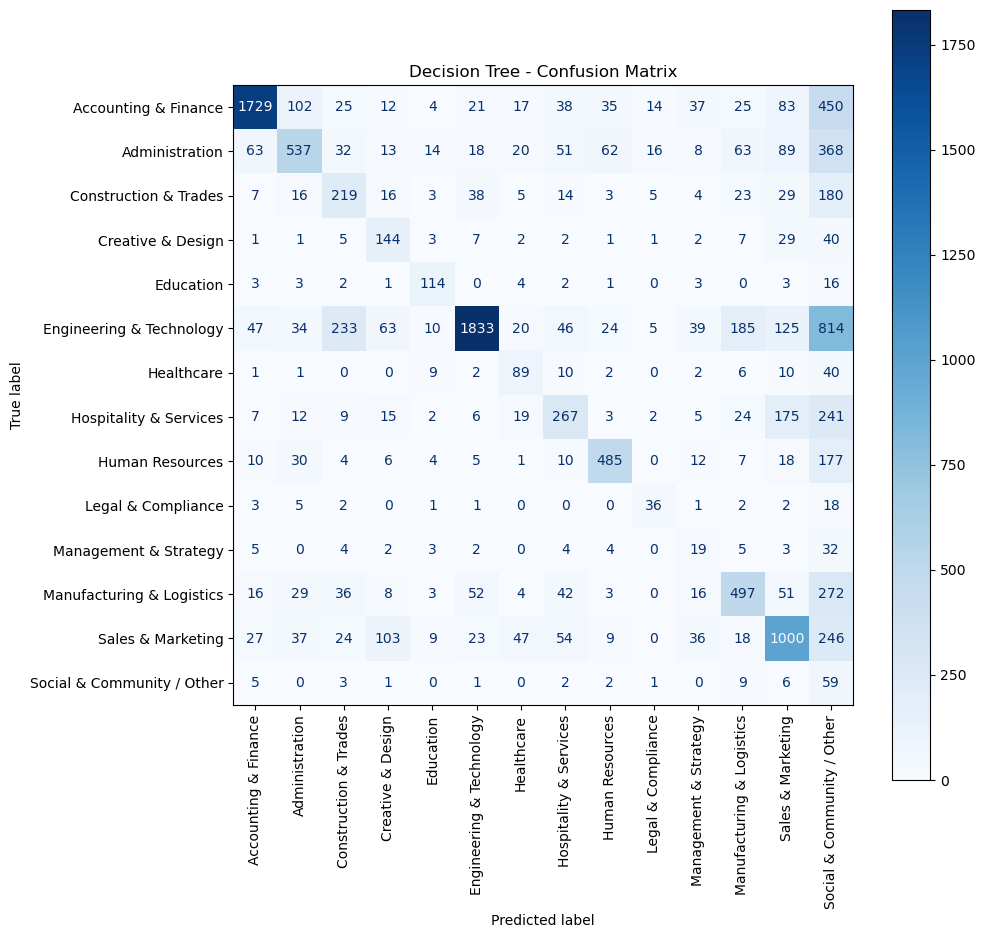

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = sorted(y_test.unique())

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest")
rf_model.fit(X_train_vect, y_train)

# Predictions
y_pred_rf= rf_model.predict(X_test_vect)

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_rf)
print(f"\n Random Forest Accuracy: {accuracy_dt:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Training Random Forest

 Random Forest Accuracy: 0.7428

Classification Report:
                            precision    recall  f1-score   support

      Accounting & Finance       0.90      0.83      0.87      2592
            Administration       0.78      0.59      0.67      1354
     Construction & Trades       0.47      0.54      0.50       562
         Creative & Design       0.58      0.77      0.66       245
                 Education       0.68      0.86      0.76       152
  Engineering & Technology       0.89      0.76      0.82      3478
                Healthcare       0.50      0.81      0.62       172
    Hospitality & Services       0.58      0.67      0.62       787
           Human Resources       0.75      0.87      0.80       769
        Legal & Compliance       0.39      0.85      0.53        71
     Management & Strategy       0.26      0.40      0.32        83
 Manufacturing & Logistics       0.66      0.72      0.69      1029
         Sales & Marketing       0.

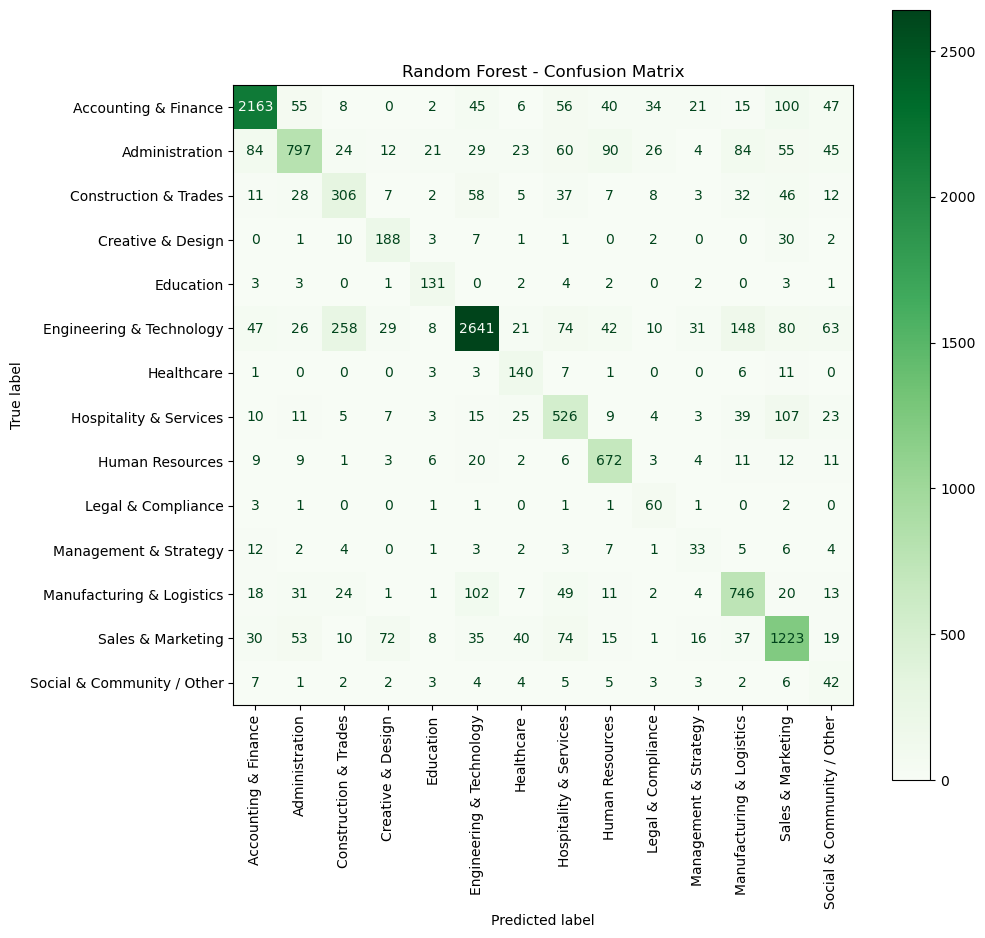

In [9]:
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, xticks_rotation=90, cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()
